In [21]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from scipy import stats
sb.set() # set the default Seaborn style for graphics

In [22]:
df = pd.read_csv("data/raw_2019.csv")

In [23]:
df

,Unnamed: 0,Country,Healthy Life Expectancy,Happiness Score,Peaceful Index,Education,Unemployment Rate
0,0,Afghanistan,0.361,3.203,3.569,0.414,11.217000
1,1,Albania,0.874,4.719,1.764,0.746,11.470000
2,2,Algeria,0.785,5.211,2.240,0.672,10.513000
3,3,Argentina,0.881,6.086,1.987,0.855,9.840000
4,4,Armenia,0.815,4.559,2.169,0.740,18.299999
...,...,...,...,...,...,...,...
120,120,United Kingdom,0.996,7.054,1.717,0.928,3.740000
121,121,Uruguay,0.891,6.293,1.700,0.765,8.880000
122,122,Uzbekistan,0.756,6.174,2.074,0.729,5.850000
123,123,Zambia,0.426,4.107,1.824,0.557,12.520000


In [24]:
df = df.iloc[:, 1:]

In [25]:
df.describe()

,Healthy Life Expectancy,Happiness Score,Peaceful Index,Education,Unemployment Rate
count,125.000000,125.000000,125.000000,125.000000,125.000000
mean,0.735720,5.456376,2.017440,0.670728,6.935736
std,0.235463,1.124551,0.480791,0.179902,5.365473
min,0.105000,2.853000,1.093000,0.249000,0.100000
25%,0.571000,4.559000,1.682000,0.532000,3.510000
50%,0.808000,5.425000,1.959000,0.694000,5.020000
75%,0.884000,6.199000,2.262000,0.817000,9.280000
max,1.141000,7.769000,3.569000,0.943000,28.469999


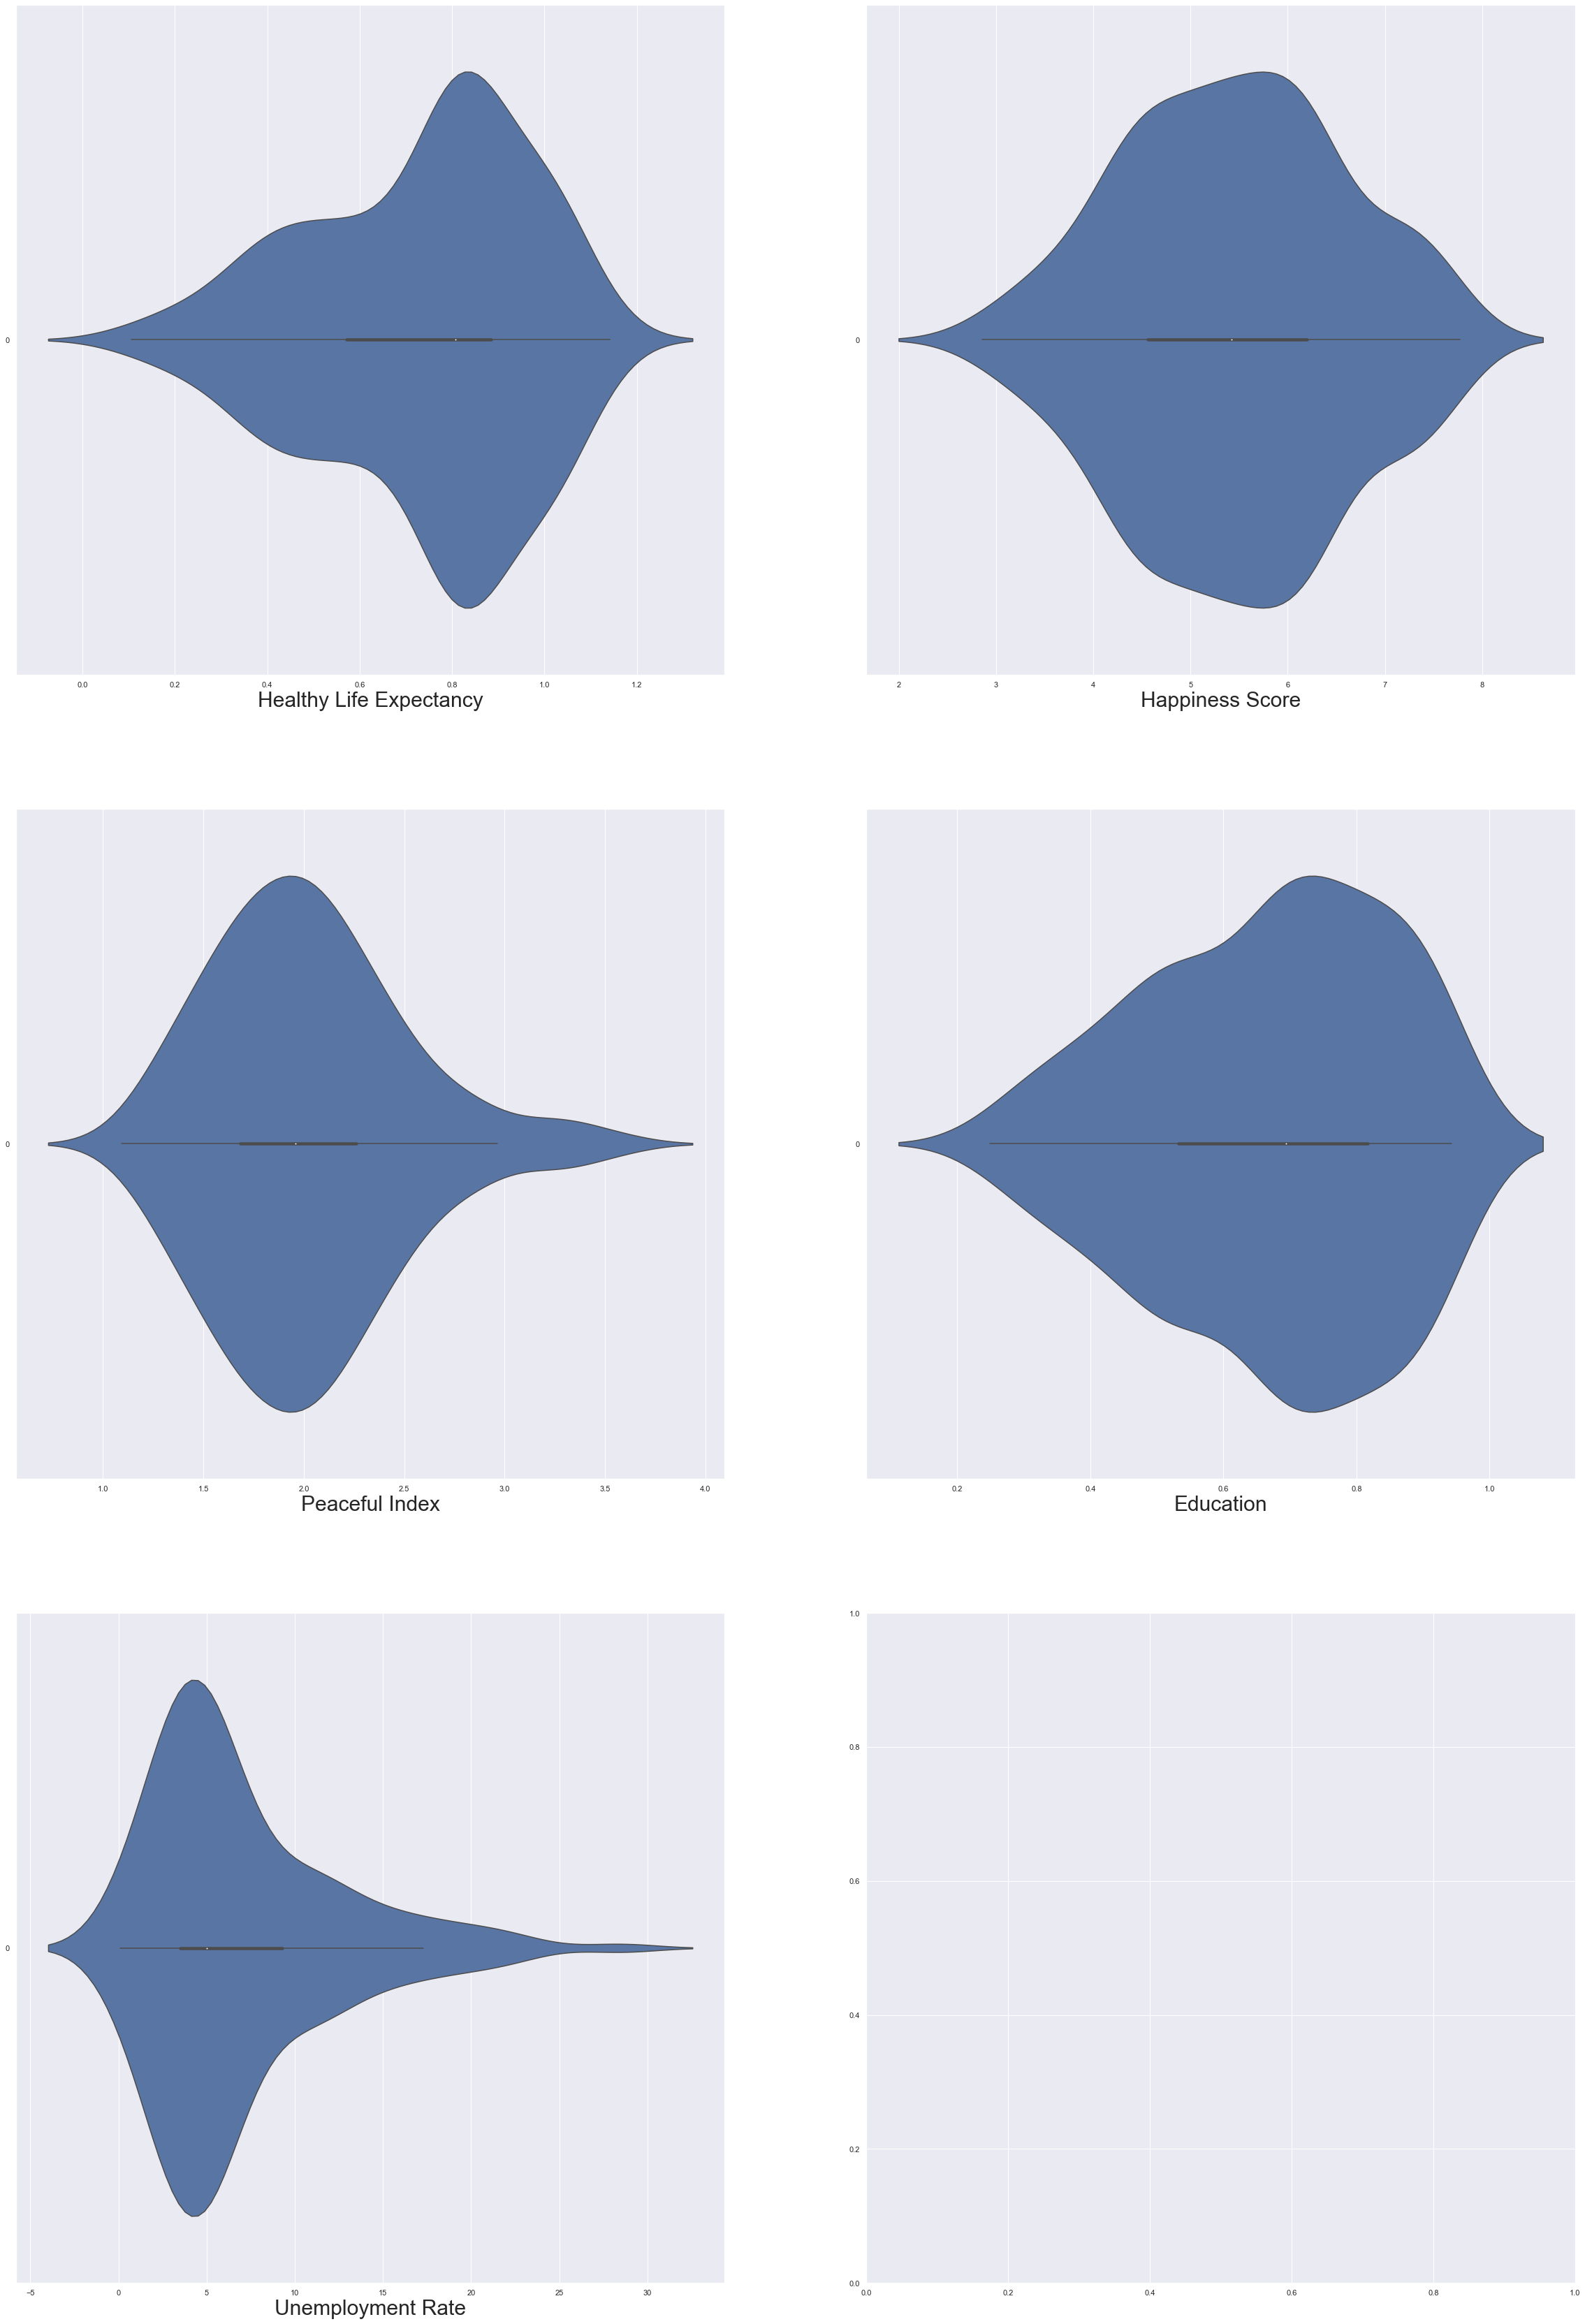

In [26]:
f, axes = plt.subplots(3,2,figsize=(40,60))
count = 0
row = 0
num_data = df.columns[1:]
for var in num_data:
    if count % 2 == 0:
        col = 0
    else:
        col = 1
    sb.violinplot(data = df[var], orient = "h", ax = axes[row,col])
    ax = axes[row,col]
    ax.set_xlabel(var,fontsize=30)
    count+=1
    if count %2 == 0:
        row+=1

In [27]:
for var in num_data:
    print(f'skewness of {var} : {df[var].skew()}')

skewness of Healthy Life Expectancy : -0.620690533524104
skewness of Happiness Score : -0.0014274062570391684
skewness of Peaceful Index : 0.7740002560182019
skewness of Education : -0.40305970310314415
skewness of Unemployment Rate : 1.5220102251576224


Education and Healthy Life Expectancy are right skewed, whereas Peaceful Index and Uemployment Rate are left skewed.

### Data standardisation by Sigmoid function

In [28]:
def sigmoid(x):
    e = np.exp(1)
    y = 1/(1+e**(-x))
    return y
sigmoid_Healthy_Life_Expectancy = sigmoid(df["Healthy Life Expectancy"])
sigmoid_Healthy_Life_Expectancy.skew()

-0.7487673470529576

Still right skewed. We should consider other funcitons.

### Data standardisation by Hyperbolic Tangent function¶

In [29]:
tanh_Healthy_Life_Expectancy = np.tanh(df["Healthy Life Expectancy"])
tanh_Healthy_Life_Expectancy.skew()

-1.0714618302710794

### Data standardisation by Log function + 1¶

In [30]:
log_Healthy_Life_Expectancy = np.log(df["Healthy Life Expectancy"] + 1)
log_Healthy_Life_Expectancy.skew()

-0.8903977573187576

### Data standarisation by BoxCox function

In [31]:
bc_Healthy_Life_Expectancy = stats.boxcox(df["Healthy Life Expectancy"])[0]
pd.Series(bc_Healthy_Life_Expectancy).skew()

-0.2577079158695435

<AxesSubplot:>

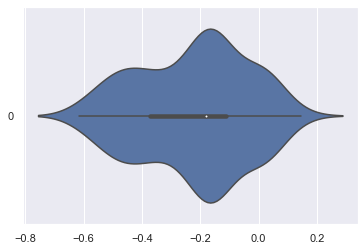

In [32]:
f, axes = plt.subplots(1)
sb.violinplot(data = pd.Series(bc_Healthy_Life_Expectancy), orient = "h")

We will utilise boxcox for other skewed values either.

In [33]:
df["Healthy Life Expectancy"] = pd.Series(bc_Healthy_Life_Expectancy)

In [34]:
bc = stats.boxcox(df["Peaceful Index"])[0]
df["Peaceful Index"] = pd.Series(bc)
print(df["Peaceful Index"].skew())

0.001339649756512068


In [35]:
bc = stats.boxcox(df["Education"])[0]
df["Education"] = pd.Series(bc)
print(df["Education"].skew())

-0.16931549575424645


In [36]:
bc = stats.boxcox(df["Unemployment Rate"])[0]
df["Unemployment Rate"] = pd.Series(bc)
print(df["Unemployment Rate"].skew())

0.04448643867239052


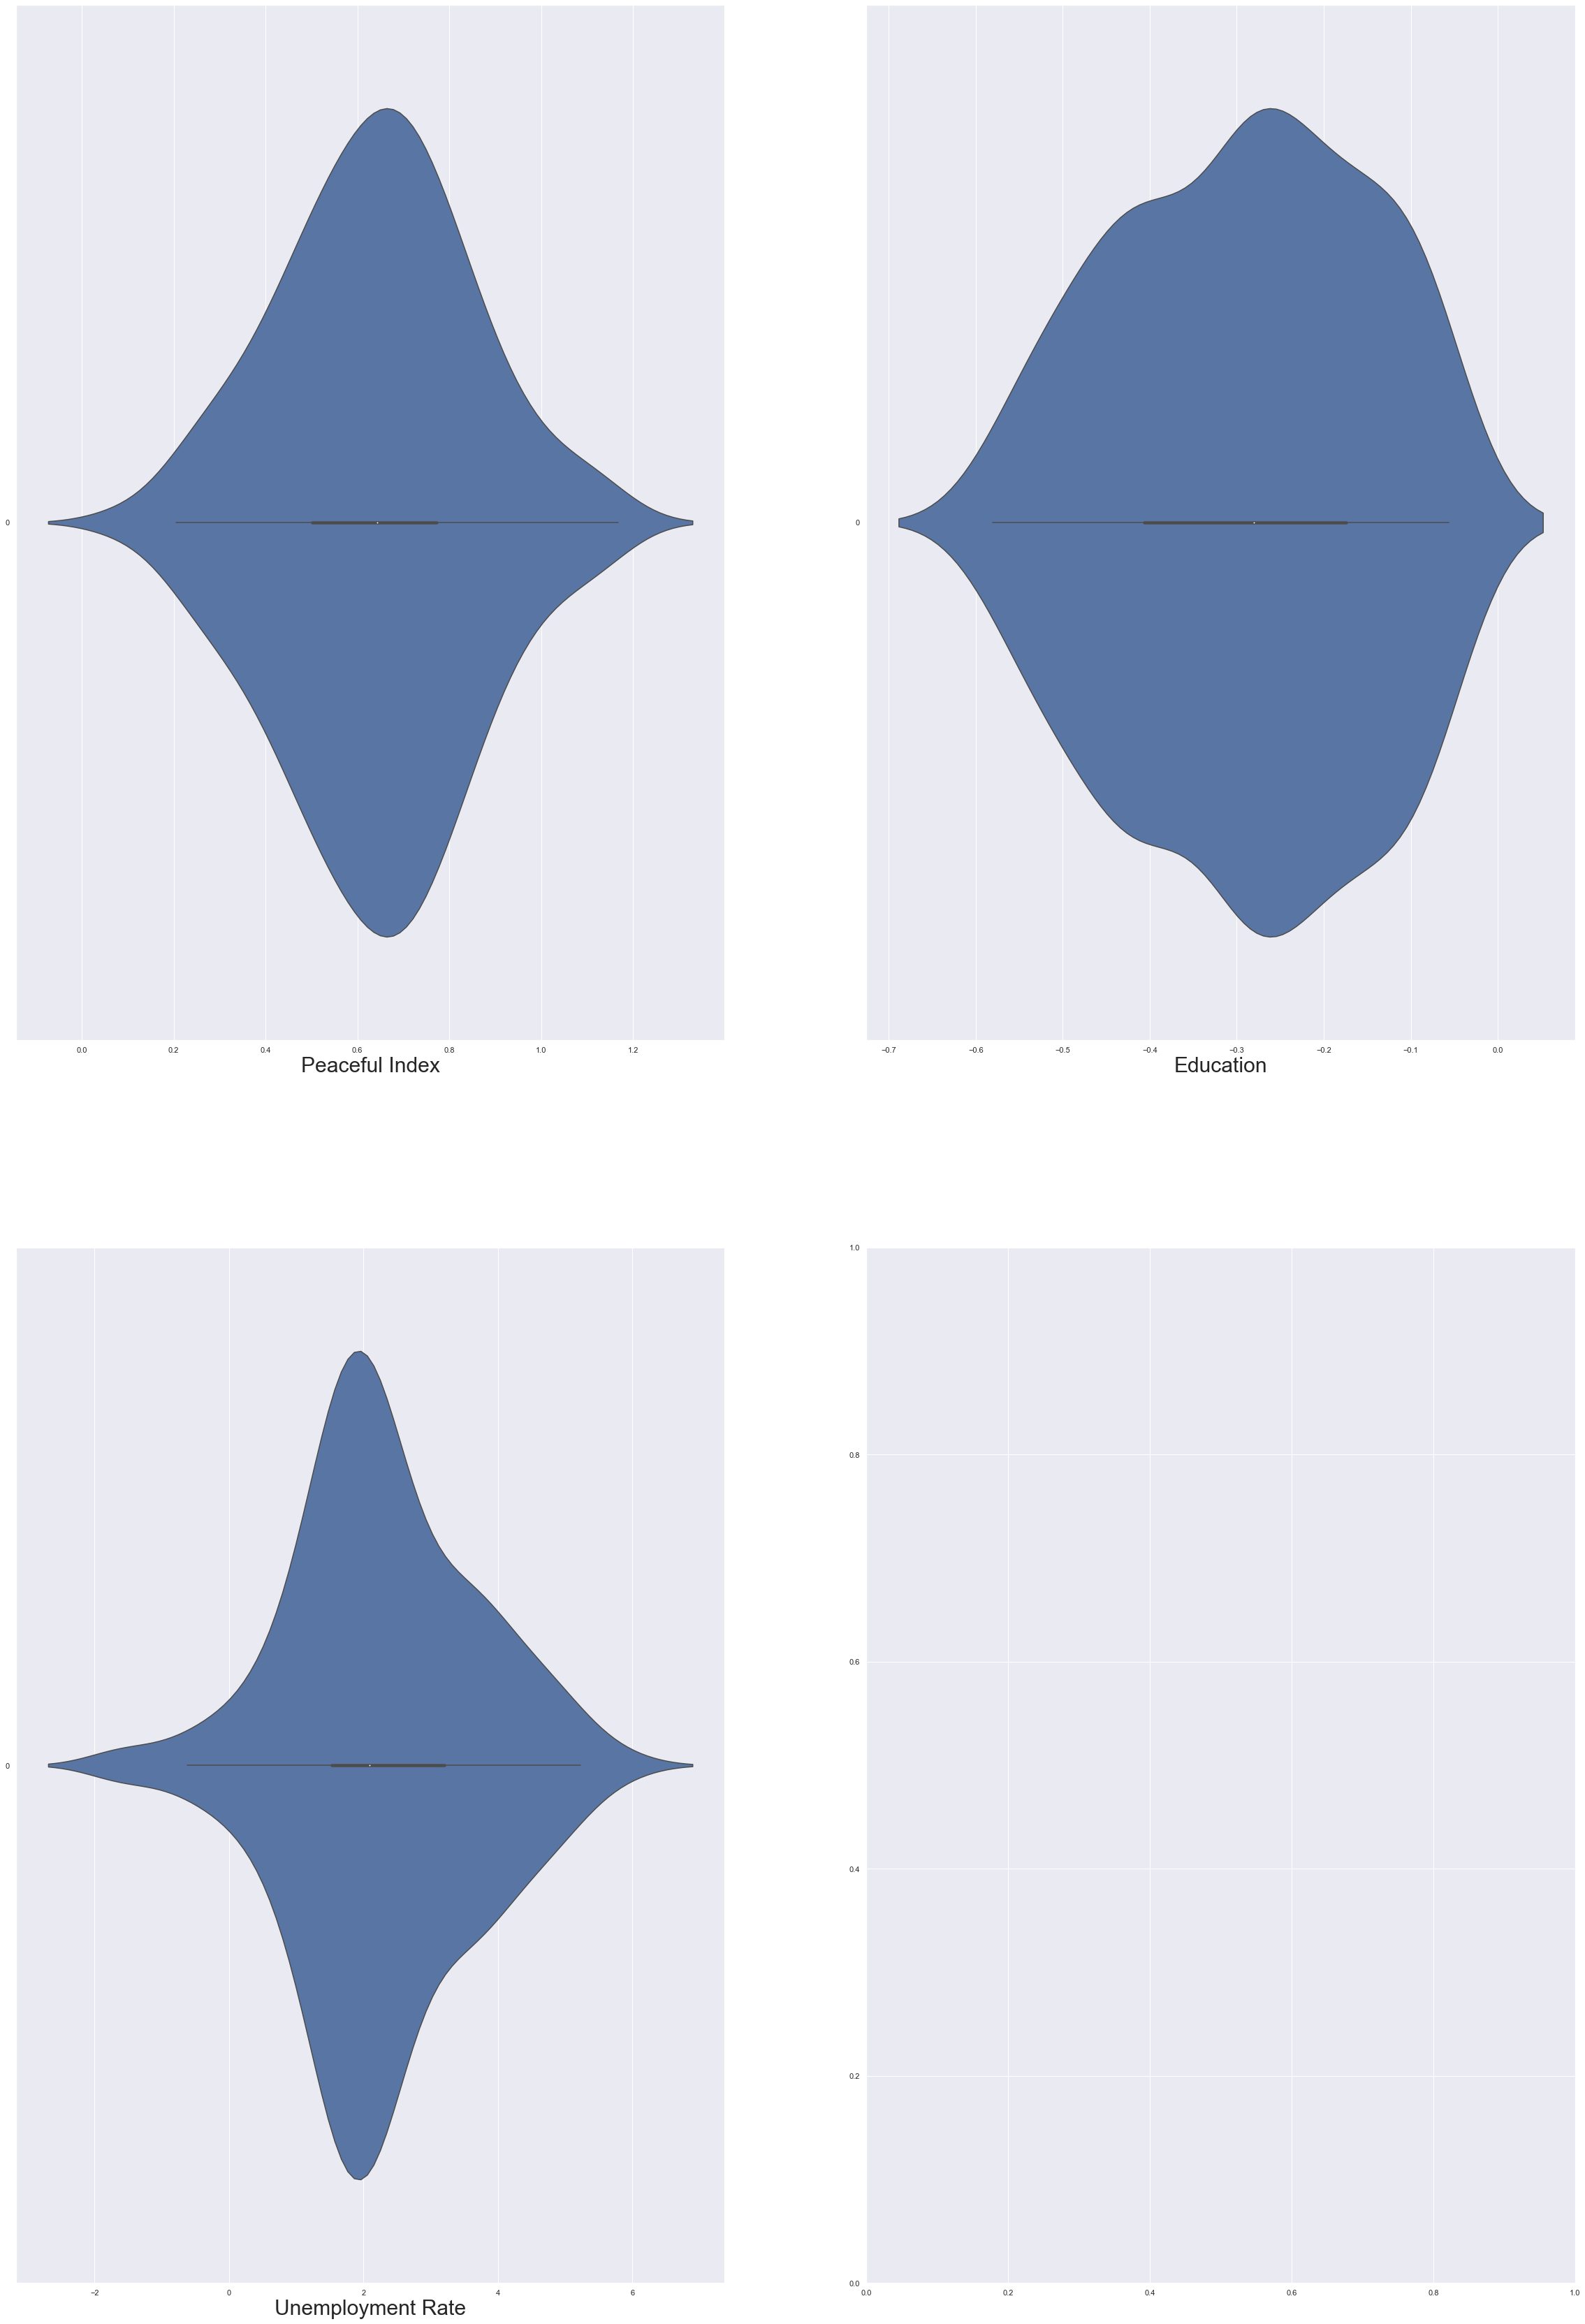

In [37]:
f, axes = plt.subplots(2,2,figsize=(40,60))
count = 0
row = 0
num_data = df.columns[3:]
for var in num_data:
    if count % 2 == 0:
        col = 0
    else:
        col = 1
    sb.violinplot(data = df[var], orient = "h", ax = axes[row,col])
    ax = axes[row,col]
    ax.set_xlabel(var,fontsize=30)
    count+=1
    if count %2 == 0:
        row+=1

### Display Heatmap

<AxesSubplot:>

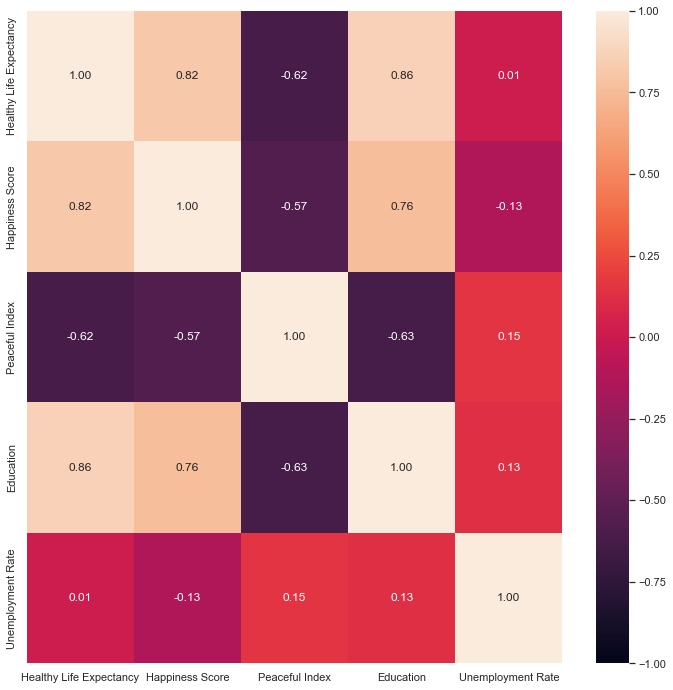

In [38]:
f = plt.figure(figsize=(12,12))
sb.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

### Display Scatter plots

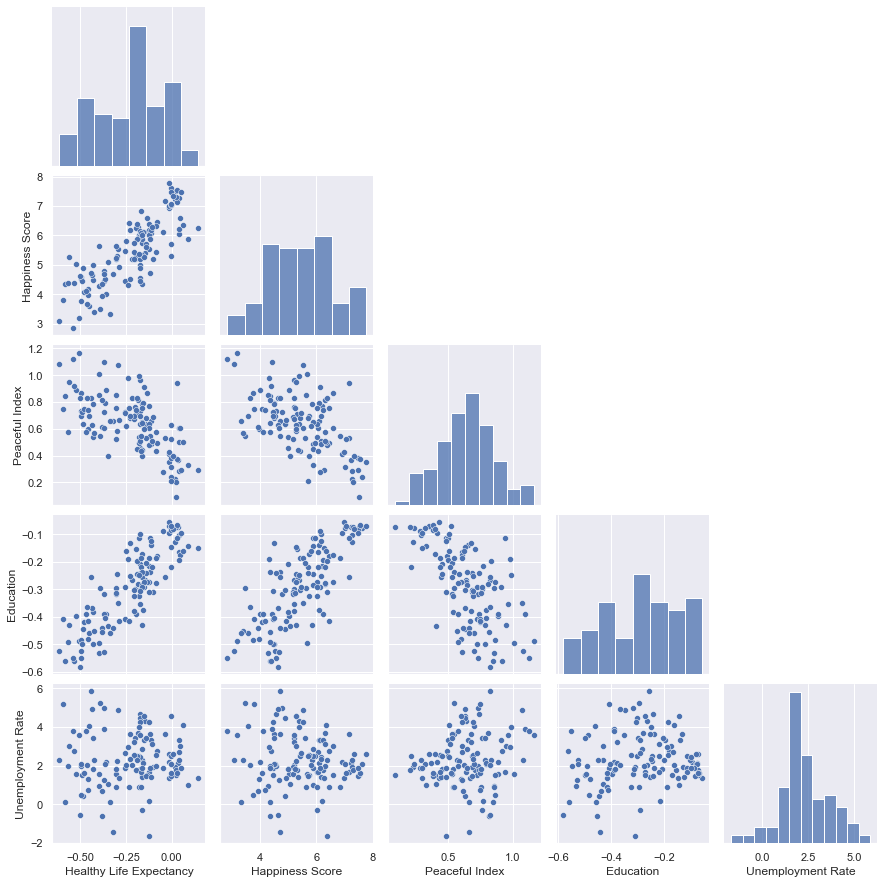

In [39]:
sb.pairplot(data = df, corner = True)

In [40]:
df.to_csv("data/standardised_2019.csv")